In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline  

In [2]:
data = pd.read_csv(r"migration_nz.csv")

In [3]:
data

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
...,...,...,...,...,...
86521,Net,Not stated,Australian Citizen,2016,80.0
86522,Net,Not stated,Total All Citizenships,2016,3177.0
86523,Net,All countries,New Zealand Citizen,2016,-1818.0
86524,Net,All countries,Australian Citizen,2016,3487.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
data['Value'].isna().sum()

np.int64(72)

In [18]:
median = data['Value'].median()
data.fillna({"Value": "median"}, inplace=True)

In [17]:
data['Value'].isna().sum()

np.int64(0)

In [7]:
data.describe()

,Year,Value
count,86526.000000,86526.000000
mean,1997.500000,254.457389
std,10.965919,3122.313365
min,1979.000000,-42627.000000
25%,1988.000000,0.000000
50%,1997.500000,0.000000
75%,2007.000000,6.000000
max,2016.000000,127305.000000


# Histogram Plot

Text(0, 0.5, 'Frequency')

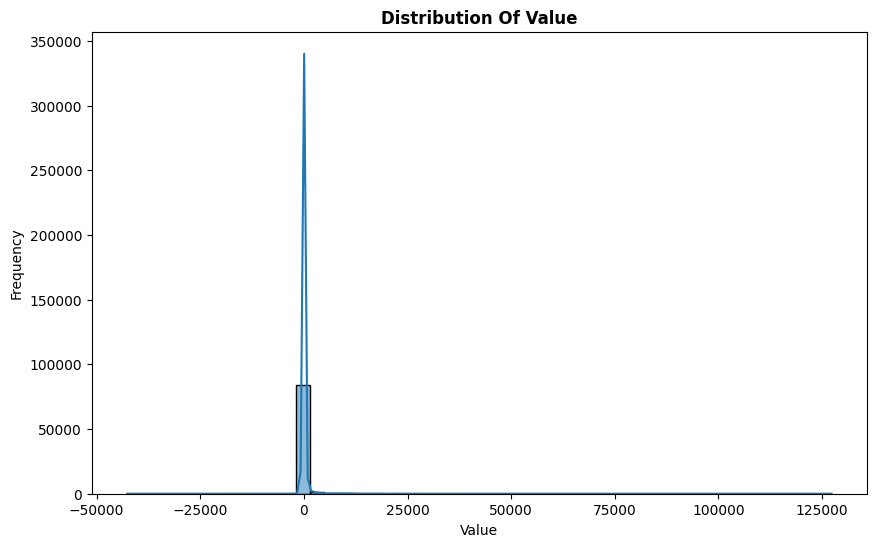

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data['Value'],bins=50,kde=True)
plt.title("Distribution Of Value",weight = 'bold')
plt.ylabel("Frequency")

# Box Plot 

Text(0.5, 1.0, 'Box Plot Of Value ')

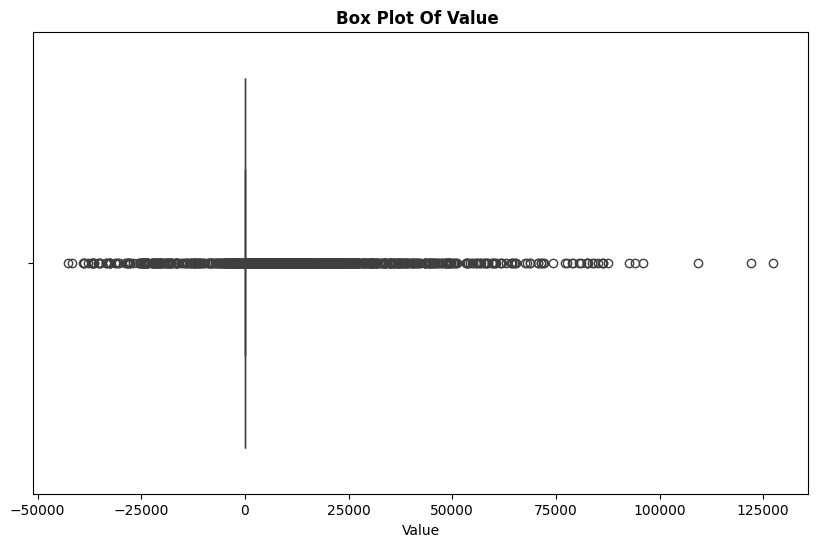

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x= data['Value'])
plt.title('Box Plot Of Value ',weight='bold')

# Scatter Plot of Year Vs Value 

Text(0.5, 1.0, 'Scatter Plot of Year Vs Values')

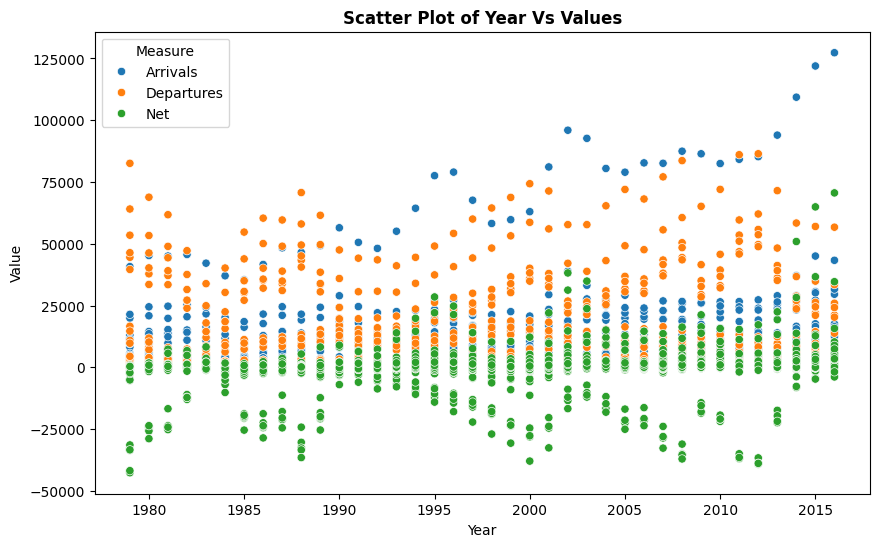

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data,x="Year",y="Value",hue="Measure")
plt.title('Scatter Plot of Year Vs Values',weight ="bold")

# Corelation Matrix Between the data 

In [42]:
numeric_data = data.apply(pd.to_numeric,errors='coerce')
numeric_data
numeric_data.corr()

,Measure,Country,Citizenship,Year,Value
Measure,NaN,NaN,NaN,NaN,NaN
Country,NaN,NaN,NaN,NaN,NaN
Citizenship,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,1.000000,0.019278
Value,NaN,NaN,NaN,0.019278,1.000000


<Axes: >

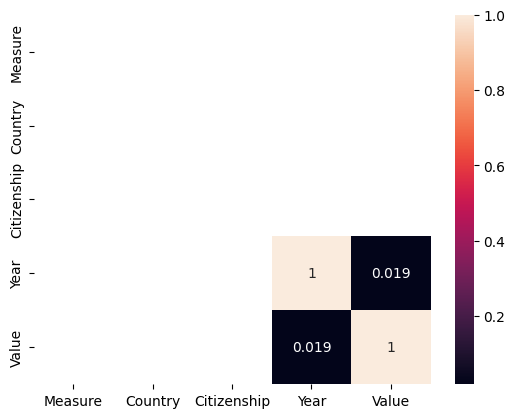

In [39]:
sns.heatmap(numeric_data.corr(),annot=True)

# Data Aggregation 

In [43]:
data.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [97]:
yearly_data = data.groupby(["Year","Measure"])['Value'].sum().reset_index()
yearly_data

,Year,Measure,Value
0,1979,Arrivals,198066.0
1,1979,Departures,445522.0
2,1979,Net,-247456.0
3,1980,Arrivals,220485.0
4,1980,Departures,372636.0
...,...,...,...
109,2015,Departures,281064.0
110,2015,Net,187499.0
111,2016,Arrivals,489158.0
112,2016,Departures,276552.0


Text(0.5, 1.0, 'Migration Over Time ')

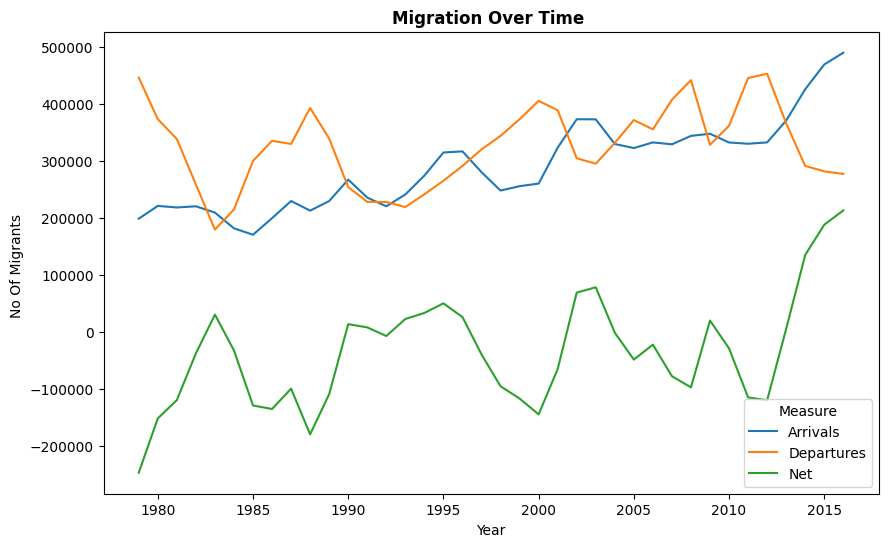

In [99]:
plt.figure(figsize=(10,6))
sns.lineplot(yearly_data,x="Year",y="Value", markers="--",hue="Measure")
plt.ylabel("No Of Migrants ")
plt.title('Migration Over Time ',weight="bold")

# Group By Country 

In [100]:
country_data = data.groupby(["Country","Measure"])['Value'].sum().reset_index()
country_data

,Country,Measure,Value
0,Afghanistan,Arrivals,1644.0
1,Afghanistan,Departures,464.0
2,Afghanistan,Net,1180.0
3,Africa and the Middle East,Arrivals,149784.0
4,Africa and the Middle East,Departures,63555.0
...,...,...,...
754,Zambia,Departures,897.0
755,Zambia,Net,930.0
756,Zimbabwe,Arrivals,5769.0
757,Zimbabwe,Departures,1161.0


# Bar  Chart For Country Data 

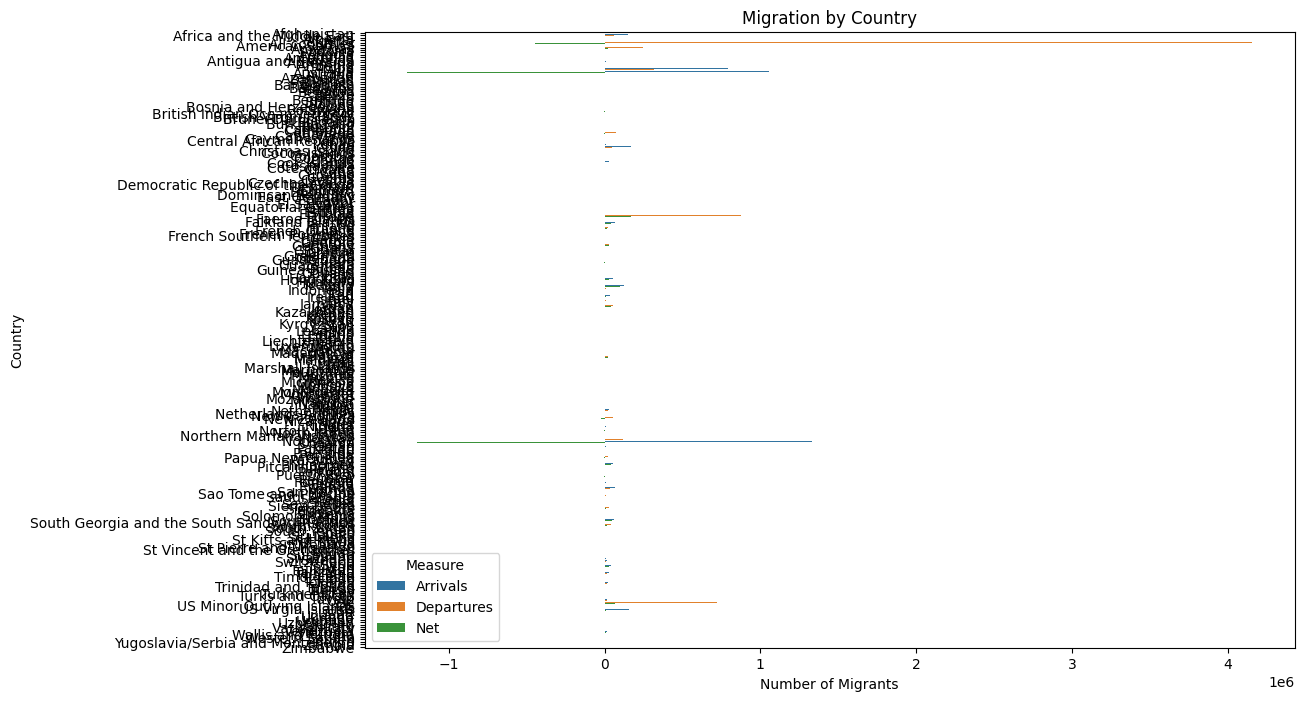

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(data=country_data, x='Value', y='Country', hue='Measure', orient='h')
plt.title('Migration by Country')
plt.xlabel('Number of Migrants')
plt.ylabel('Country')
plt.legend(title='Measure')
plt.show()

# Top Countries For Arrival 

In [105]:
top_arrival = country_data[country_data['Measure']== "Arrivals"].nlargest(10,"Value")
top_arrival

,Country,Measure,Value
12,All countries,Arrivals,3709647.0
504,Oceania,Arrivals,1331987.0
48,Australia,Arrivals,1057127.0
225,Europe,Arrivals,1044693.0
45,Asia,Arrivals,795697.0
702,UK,Arrivals,789223.0
18,Americas,Arrivals,267137.0
141,China,Arrivals,170781.0
711,USA,Arrivals,157637.0
3,Africa and the Middle East,Arrivals,149784.0


# Top Countries For Departure

In [106]:
top_Departure = country_data[country_data['Measure']== "Departures"].nlargest(10,"Value")
top_Departure

,Country,Measure,Value
13,All countries,Departures,4158494.0
505,Oceania,Departures,2534100.0
49,Australia,Departures,2325398.0
226,Europe,Departures,877240.0
703,UK,Departures,719715.0
46,Asia,Departures,317603.0
19,Americas,Departures,245915.0
712,USA,Departures,148055.0
502,Not stated,Departures,120081.0
124,Canada,Departures,71459.0


# Migration By Citizenship 

In [107]:
data.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [110]:
Citizenship_Data= data.groupby(["Citizenship","Measure"])['Value'].sum().reset_index()
Citizenship_Data

,Citizenship,Measure,Value
0,Australian Citizen,Arrivals,486802.0
1,Australian Citizen,Departures,325418.0
2,Australian Citizen,Net,161384.0
3,New Zealand Citizen,Arrivals,2726074.0
4,New Zealand Citizen,Departures,5082276.0
5,New Zealand Citizen,Net,-2356202.0
6,Total All Citizenships,Arrivals,7795714.0
7,Total All Citizenships,Departures,6947697.0
8,Total All Citizenships,Net,848017.0


# Bar Plot for migration By Citizenship 

Text(0.5, 1.0, 'Migration By Citizenship')

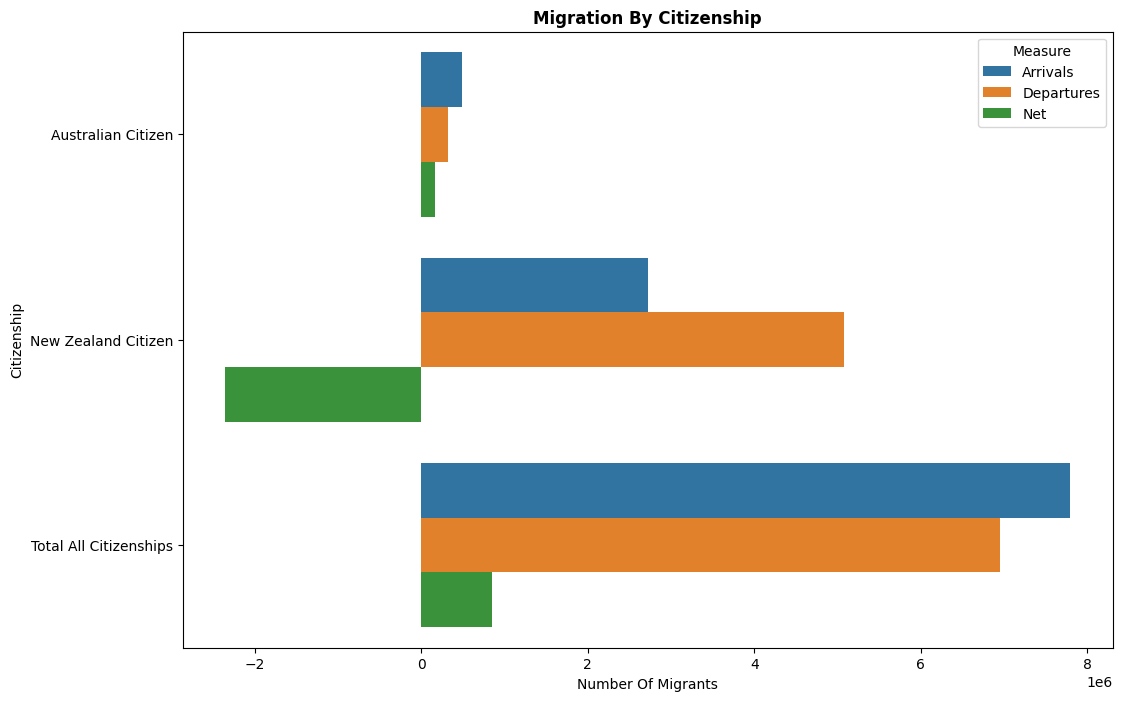

In [117]:
plt.figure(figsize=(12,8))
sns.barplot(Citizenship_Data,x="Value",y='Citizenship',hue="Measure",orient="h")
plt.xlabel("Number Of Migrants")
plt.title('Migration By Citizenship',weight='bold')

# Top Citizenship For Arrival 

In [120]:
top_arrival = Citizenship_Data[Citizenship_Data['Measure']== "Arrivals"].nlargest(10,"Value")
top_arrival

,Citizenship,Measure,Value
6,Total All Citizenships,Arrivals,7795714.0
3,New Zealand Citizen,Arrivals,2726074.0
0,Australian Citizen,Arrivals,486802.0


# Top Citizenship For departure 

In [121]:
top_Departure = Citizenship_Data[Citizenship_Data['Measure']== "Departures"].nlargest(10,"Value")
top_Departure

,Citizenship,Measure,Value
7,Total All Citizenships,Departures,6947697.0
4,New Zealand Citizen,Departures,5082276.0
1,Australian Citizen,Departures,325418.0
